Analyzing Covid **data**

1. Detailed Trend Analysis of Confirmed Cases
Question: How has the number of confirmed COVID-19 cases evolved over the 515 days for different states? Can you identify any patterns or significant trends, such as periods of rapid increase or decrease?

Hint:

Use line plots to visualise the confirmed cases over time for at least one state. Use libraries like matplotlib or Excel for plotting.
Look for peaks (highest points) and plateaus (steady periods).
Identify periods where the growth rate increased rapidly and when it started to slow down.
Consider external factors (e.g., government interventions) that might explain sudden changes in the trend.

In [4]:
#load the dataset
#import libraries required
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json

In [5]:
#load the dataset
covid=pd.read_json('/content/drive/MyDrive/Computer/covid_states_daily.json')

In [6]:
covid.head()

,states_daily
0,"{'an': '0', 'ap': '1', 'ar': '0', 'as': '0', '..."
1,"{'an': '0', 'ap': '0', 'ar': '0', 'as': '0', '..."
2,"{'an': '0', 'ap': '0', 'ar': '0', 'as': '0', '..."
3,"{'an': '0', 'ap': '0', 'ar': '0', 'as': '0', '..."
4,"{'an': '0', 'ap': '0', 'ar': '0', 'as': '0', '..."


In [8]:
# Get a summary of the data
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1563 entries, 0 to 1562
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   states_daily  1563 non-null   object
dtypes: object(1)
memory usage: 12.3+ KB


In [7]:
# Check the column names in the dataset
print(covid.columns)


Index(['states_daily'], dtype='object')


In [9]:
# Display the first few rows of the 'states_daily' column
print(covid['states_daily'].head())


0    {'an': '0', 'ap': '1', 'ar': '0', 'as': '0', '...
1    {'an': '0', 'ap': '0', 'ar': '0', 'as': '0', '...
2    {'an': '0', 'ap': '0', 'ar': '0', 'as': '0', '...
3    {'an': '0', 'ap': '0', 'ar': '0', 'as': '0', '...
4    {'an': '0', 'ap': '0', 'ar': '0', 'as': '0', '...
Name: states_daily, dtype: object


In [10]:
# Convert the list of dictionaries to a DataFrame
states_daily_df = pd.json_normalize(covid['states_daily'])

# Display the first few rows to see the structure
states_daily_df.head()


,an,ap,ar,as,br,ch,ct,date,dateymd,dd,...,sk,status,tg,tn,tr,tt,un,up,ut,wb
0,0,1,0,0,0,0,0,14-Mar-20,2020-03-14,0,...,0,Confirmed,1,1,0,81,0,12,0,0
1,0,0,0,0,0,0,0,14-Mar-20,2020-03-14,0,...,0,Recovered,0,0,0,9,0,4,0,0
2,0,0,0,0,0,0,0,14-Mar-20,2020-03-14,0,...,0,Deceased,0,0,0,2,0,0,0,0
3,0,0,0,0,0,0,0,15-Mar-20,2020-03-15,0,...,0,Confirmed,2,0,0,27,0,1,0,0
4,0,0,0,0,0,0,0,15-Mar-20,2020-03-15,0,...,0,Recovered,1,0,0,4,0,0,0,0


In [11]:
# Create a date range starting from a known date (e.g., January 1st, 2020)
states_daily_df['date'] = pd.date_range(start='2020-01-01', periods=len(states_daily_df), freq='D')

# Set 'date' as the index
states_daily_df.set_index('date', inplace=True)

# Display the updated DataFrame
states_daily_df.head()


,an,ap,ar,as,br,ch,ct,dateymd,dd,dl,...,sk,status,tg,tn,tr,tt,un,up,ut,wb
date,,,,,,,,,,,,,,,,,,,,,
2020-01-01,0,1,0,0,0,0,0,2020-03-14,0,7,...,0,Confirmed,1,1,0,81,0,12,0,0
2020-01-02,0,0,0,0,0,0,0,2020-03-14,0,1,...,0,Recovered,0,0,0,9,0,4,0,0
2020-01-03,0,0,0,0,0,0,0,2020-03-14,0,1,...,0,Deceased,0,0,0,2,0,0,0,0
2020-01-04,0,0,0,0,0,0,0,2020-03-15,0,0,...,0,Confirmed,2,0,0,27,0,1,0,0
2020-01-05,0,0,0,0,0,0,0,2020-03-15,0,1,...,0,Recovered,1,0,0,4,0,0,0,0


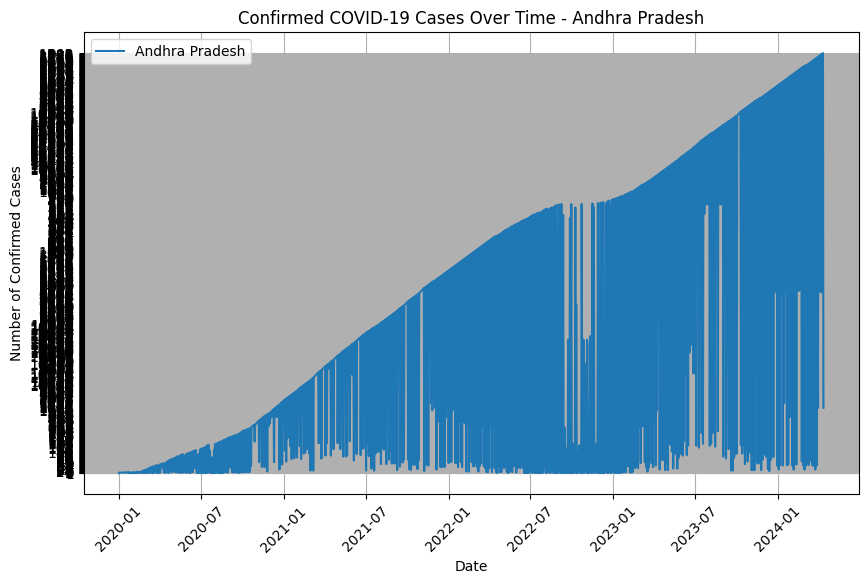

In [12]:
# Plot confirmed cases for Andhra Pradesh ('ap')
plt.figure(figsize=(10, 6))
plt.plot(states_daily_df.index, states_daily_df['ap'], label='Andhra Pradesh')
plt.title('Confirmed COVID-19 Cases Over Time - Andhra Pradesh')
plt.xlabel('Date')
plt.ylabel('Number of Confirmed Cases')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()


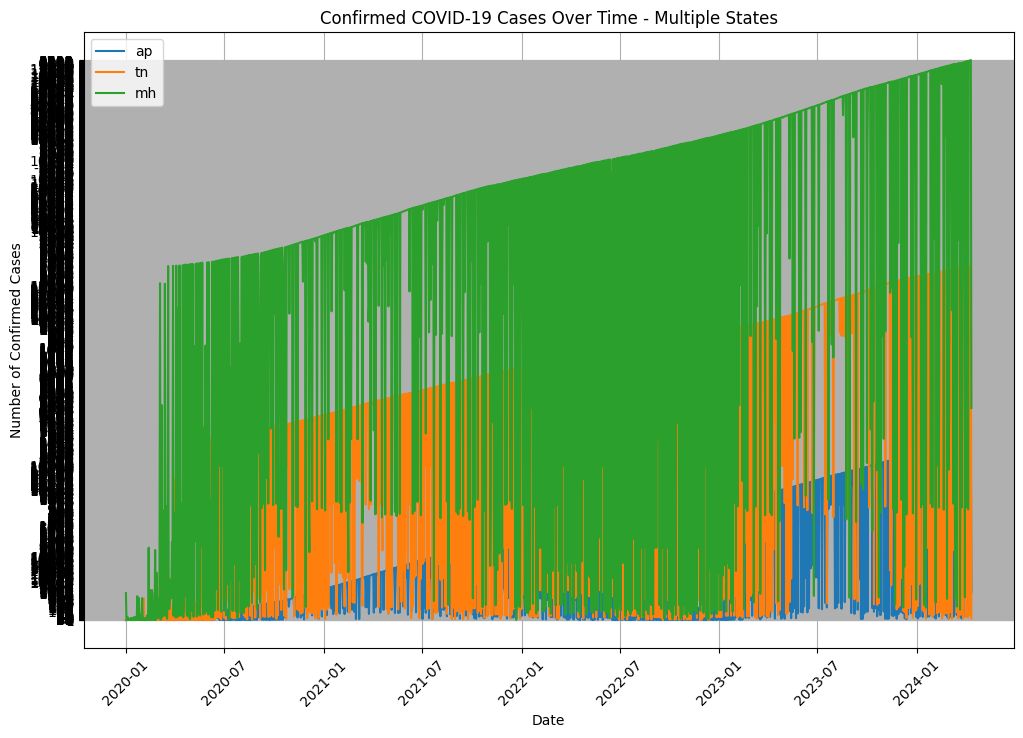

In [13]:
# Plot confirmed cases for multiple states
plt.figure(figsize=(12, 8))
for state in ['ap', 'tn', 'mh']:  # Andhra Pradesh, Tamil Nadu, Maharashtra
    plt.plot(states_daily_df.index, states_daily_df[state], label=state)

plt.title('Confirmed COVID-19 Cases Over Time - Multiple States')
plt.xlabel('Date')
plt.ylabel('Number of Confirmed Cases')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()


In [16]:
print(states_daily_df.columns)


Index(['an', 'ap', 'ar', 'as', 'br', 'ch', 'ct', 'dateymd', 'dd', 'dl', 'dn',
       'ga', 'gj', 'hp', 'hr', 'jh', 'jk', 'ka', 'kl', 'la', 'ld', 'mh', 'ml',
       'mn', 'mp', 'mz', 'nl', 'or', 'pb', 'py', 'rj', 'sk', 'status', 'tg',
       'tn', 'tr', 'tt', 'un', 'up', 'ut', 'wb'],
      dtype='object')


521 521 521


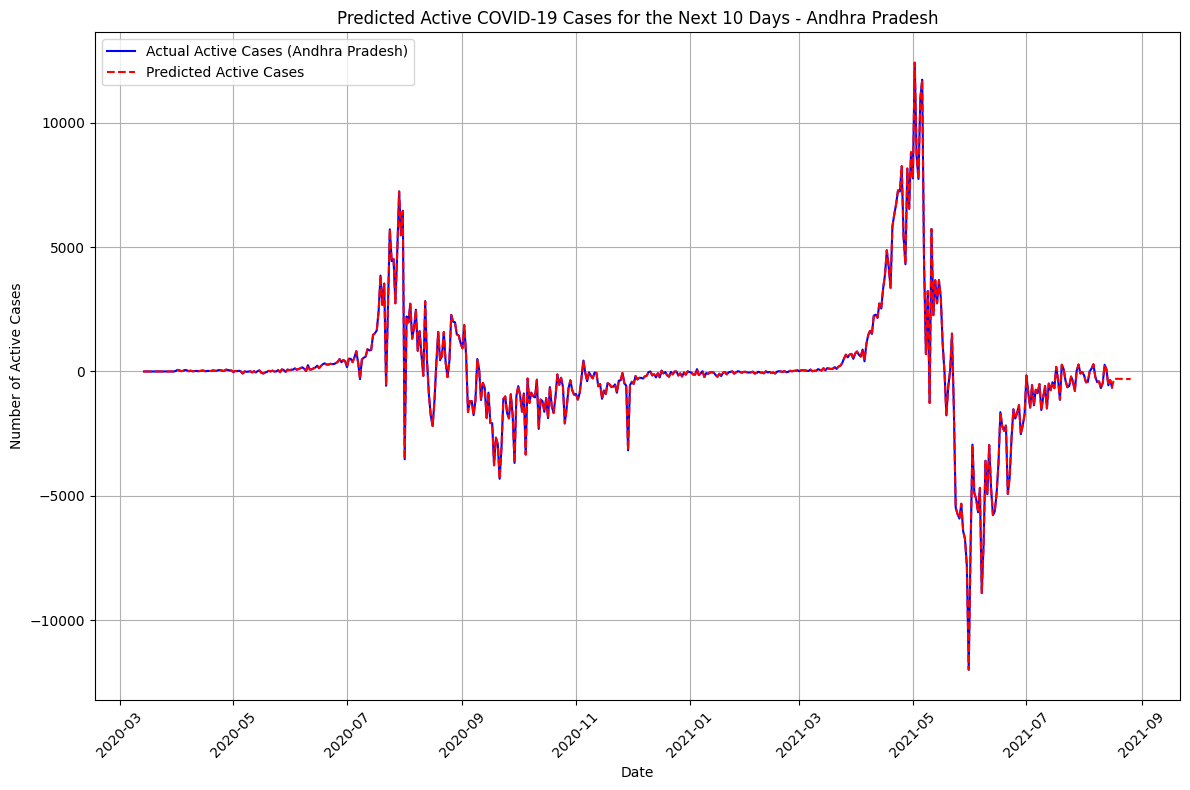

In [19]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Assuming the DataFrame `states_daily_df` is loaded and dateymd is in 'datetime' format

# Filter data for Andhra Pradesh ('ap') and separate by status
confirmed_ap = states_daily_df[states_daily_df['status'] == 'Confirmed']['ap'].astype(int).reset_index(drop=True)
recovered_ap = states_daily_df[states_daily_df['status'] == 'Recovered']['ap'].astype(int).reset_index(drop=True)
deceased_ap = states_daily_df[states_daily_df['status'] == 'Deceased']['ap'].astype(int).reset_index(drop=True)

# Make sure the lengths of the data match
print(len(confirmed_ap), len(recovered_ap), len(deceased_ap))

# Step 1: Calculate Active Cases
active_ap = confirmed_ap - recovered_ap - deceased_ap

# Step 2: Prepare Data for Linear Regression
X = np.array(range(len(active_ap))).reshape(-1, 1)  # Days as features
y = active_ap.values  # Active cases as the target

# Step 3: Train Linear Regression Model
model = LinearRegression()
model.fit(X, y)

# Step 4: Predict the Next 10 Days
future_days = 10
future_X = np.array(range(len(active_ap), len(active_ap) + future_days)).reshape(-1, 1)
predicted_active_cases = model.predict(future_X)

# Step 5: Combine past and predicted data for plotting
predicted_all = np.concatenate([y, predicted_active_cases])

# Step 6: Plot the results
plt.figure(figsize=(12, 8))

# Make sure dateymd is in datetime format for proper plotting
states_daily_df['dateymd'] = pd.to_datetime(states_daily_df['dateymd'])

# Plot actual active cases
plt.plot(states_daily_df[states_daily_df['status'] == 'Confirmed']['dateymd'].reset_index(drop=True),
         active_ap, label='Actual Active Cases (Andhra Pradesh)', color='blue')

# Generate future dates starting from the last date in the dataset
last_date = states_daily_df[states_daily_df['status'] == 'Confirmed']['dateymd'].values[-1]
future_dates = pd.date_range(last_date, periods=future_days + 1, freq='D')[1:]

# Combine actual dates and future dates for plotting
all_dates = list(states_daily_df[states_daily_df['status'] == 'Confirmed']['dateymd'].values) + list(future_dates)

# Plot predicted active cases
plt.plot(all_dates, predicted_all, label='Predicted Active Cases', color='red', linestyle='--')

# Formatting the plot
plt.title('Predicted Active COVID-19 Cases for the Next 10 Days - Andhra Pradesh')
plt.xlabel('Date')
plt.ylabel('Number of Active Cases')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()  # To make sure labels are not cut off
plt.show()


Predicting Future Active Cases

Question: Based on the past 515 days of data, can you predict the number of active COVID-19 cases for the next 10 days in a given state? What factors might affect the accuracy of your prediction?

Hint:

First, calculate active cases using the formula: Active Cases = Confirmed - Recovered - Deceased.
After calculating the active cases for the past 515 days, use a simple linear regression model to predict the number of active cases for the next 10 days.
Plot your predicted trend alongside the actual data to visualise the prediction.
Consider external factors like future lockdowns or new variants, which may affect the prediction accuracy.

521 521 521


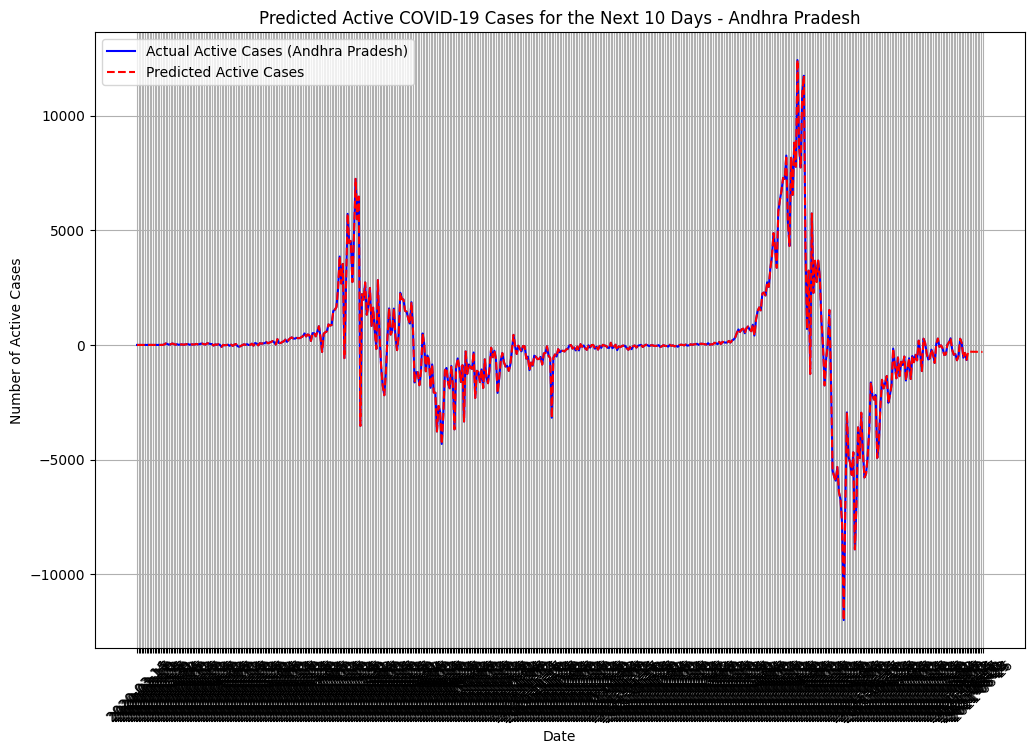

In [15]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Assuming the DataFrame `states_daily_df` is loaded

# Filter data for Andhra Pradesh ('ap') and separate by status
confirmed_ap = states_daily_df[states_daily_df['status'] == 'Confirmed']['ap'].astype(int).reset_index(drop=True)
recovered_ap = states_daily_df[states_daily_df['status'] == 'Recovered']['ap'].astype(int).reset_index(drop=True)
deceased_ap = states_daily_df[states_daily_df['status'] == 'Deceased']['ap'].astype(int).reset_index(drop=True)

# Make sure the lengths of the data match
print(len(confirmed_ap), len(recovered_ap), len(deceased_ap))

# Step 1: Calculate Active Cases
active_ap = confirmed_ap - recovered_ap - deceased_ap

# Step 2: Prepare Data for Linear Regression
X = np.array(range(len(active_ap))).reshape(-1, 1)  # Days as features
y = active_ap.values  # Active cases as the target

# Step 3: Train Linear Regression Model
model = LinearRegression()
model.fit(X, y)

# Step 4: Predict the Next 10 Days
future_days = 10
future_X = np.array(range(len(active_ap), len(active_ap) + future_days)).reshape(-1, 1)
predicted_active_cases = model.predict(future_X)

# Step 5: Combine past and predicted data for plotting
predicted_all = np.concatenate([y, predicted_active_cases])

# Step 6: Plot the results
plt.figure(figsize=(12, 8))
plt.plot(states_daily_df[states_daily_df['status'] == 'Confirmed']['dateymd'].reset_index(drop=True), active_ap, label='Actual Active Cases (Andhra Pradesh)', color='blue')
future_dates = pd.date_range(states_daily_df[states_daily_df['status'] == 'Confirmed']['dateymd'].values[-1], periods=future_days + 1, freq='D')[1:]

# Convert dates to strings for plotting
x_dates = list(states_daily_df[states_daily_df['status'] == 'Confirmed']['dateymd'].astype(str).values) + list(future_dates.astype(str))

# Now plot with string dates:
plt.plot(x_dates, predicted_all, label='Predicted Active Cases', color='red', linestyle='--')

plt.title('Predicted Active COVID-19 Cases for the Next 10 Days - Andhra Pradesh')
plt.xlabel('Date')
plt.ylabel('Number of Active Cases')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

3. Examining the Relationship Between Confirmed and Recovered Cases

Question: Is there a strong relationship between confirmed and recovered cases for a given state? Can you fit a linear equation to model this relationship? How strong is the correlation between the two?

Hint:

Extract confirmed and recovered cases for a state and plot them against each other using a scatter plot.
Use linear regression to fit a line to the data points and find the equation of the line.
Compute the correlation coefficient (R²) to assess the strength of the relationship between confirmed and recovered cases.
Use Python libraries like NumPy and scikit-learn to perform the linear regression.

521 521


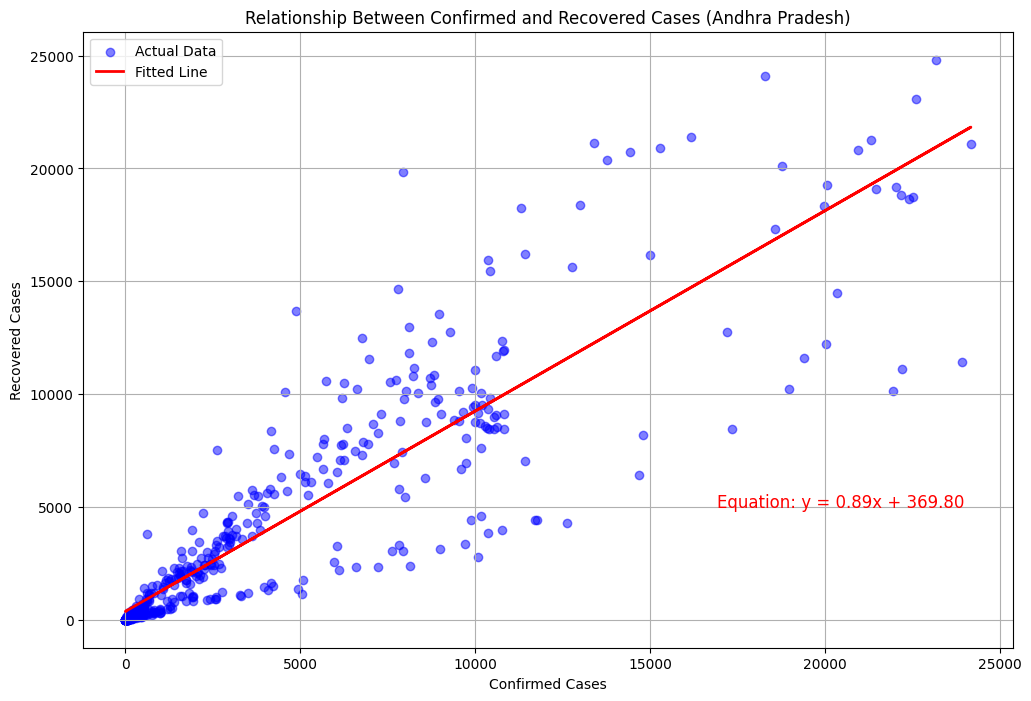

R² value: 0.81


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Assuming the DataFrame `states_daily_df` is loaded

# Step 1: Filter data for Andhra Pradesh ('ap') and separate by status
confirmed_ap = states_daily_df[states_daily_df['status'] == 'Confirmed']['ap'].astype(int).reset_index(drop=True)
recovered_ap = states_daily_df[states_daily_df['status'] == 'Recovered']['ap'].astype(int).reset_index(drop=True)

# Check the lengths to ensure they match
print(len(confirmed_ap), len(recovered_ap))

# Step 2: Prepare the data for linear regression
X = confirmed_ap.values.reshape(-1, 1)  # Confirmed cases as the independent variable
y = recovered_ap.values  # Recovered cases as the dependent variable

# Step 3: Fit the Linear Regression Model
model = LinearRegression()
model.fit(X, y)

# Step 4: Get the linear regression line parameters
slope = model.coef_[0]
intercept = model.intercept_

# Step 5: Predict recovered cases using the model
predicted_recovered = model.predict(X)

# Step 6: Calculate the R² value (coefficient of determination)
r_squared = r2_score(y, predicted_recovered)

# Step 7: Plot the results
plt.figure(figsize=(12, 8))
plt.scatter(confirmed_ap, recovered_ap, label='Actual Data', color='blue', alpha=0.5)
plt.plot(confirmed_ap, predicted_recovered, color='red', linewidth=2, label='Fitted Line')

# Add annotations for slope and intercept
plt.text(max(confirmed_ap)*0.7, max(recovered_ap)*0.2, f'Equation: y = {slope:.2f}x + {intercept:.2f}', fontsize=12, color='red')

plt.title('Relationship Between Confirmed and Recovered Cases (Andhra Pradesh)')
plt.xlabel('Confirmed Cases')
plt.ylabel('Recovered Cases')
plt.legend()
plt.grid(True)
plt.show()

# Print the R² value
print(f'R² value: {r_squared:.2f}')


4. Comparing Recovery Rates Across States

<ipython-input-22-9f5df98e9185>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  confirmed_df[states] = confirmed_df[states].apply(pd.to_numeric, errors='coerce')
<ipython-input-22-9f5df98e9185>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recovered_df[states] = recovered_df[states].apply(pd.to_numeric, errors='coerce')


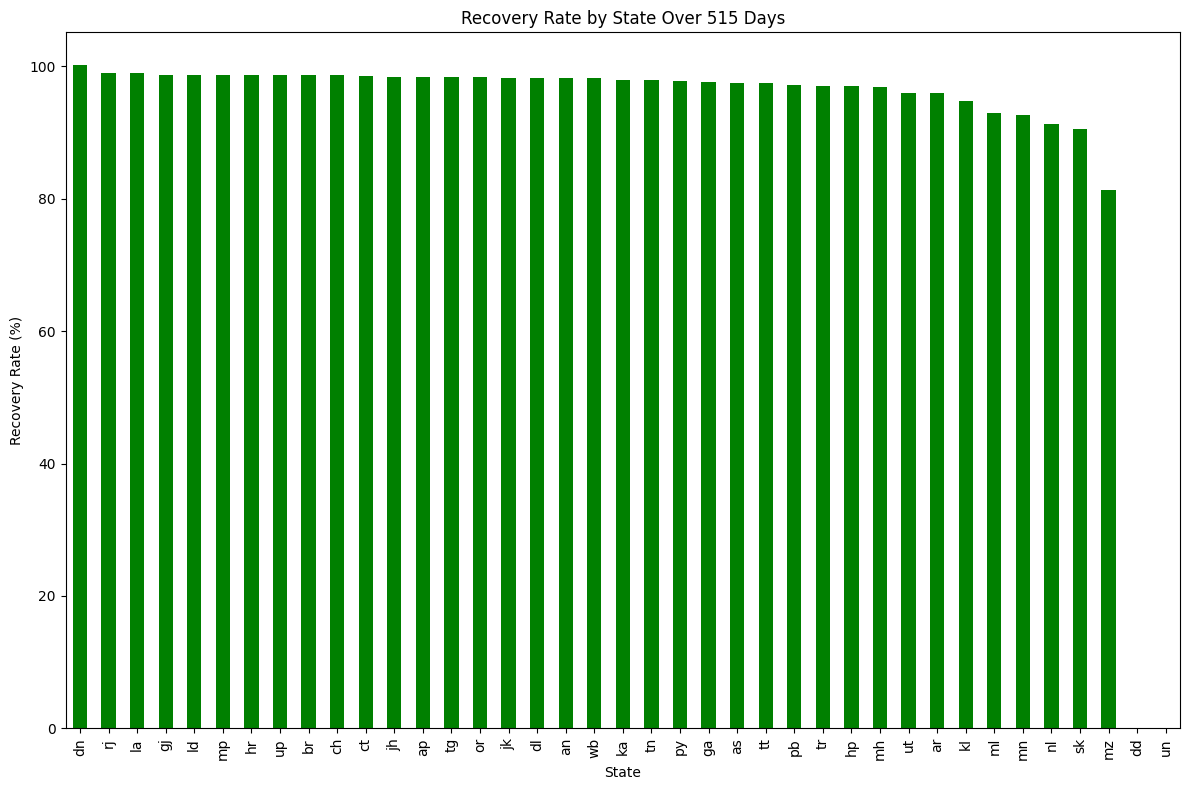

Top 5 States with Highest Recovery Rates:
dn    100.133080
rj     99.042511
la     98.924258
gj     98.756658
ld     98.737128
dtype: float64

Bottom 5 States with Lowest Recovery Rates:
nl    91.230537
sk    90.532359
mz    81.392293
dd     0.000000
un     0.000000
dtype: float64


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'states_daily_df' contains the COVID-19 data and has 'status', 'dateymd', and state columns

# Extract Confirmed and Recovered data
confirmed_df = states_daily_df[states_daily_df['status'] == 'Confirmed']
recovered_df = states_daily_df[states_daily_df['status'] == 'Recovered']

# List of all states
states = [col for col in confirmed_df.columns if col not in ['status', 'dateymd']]

# Ensure that all state columns are numeric, converting from string if necessary
confirmed_df[states] = confirmed_df[states].apply(pd.to_numeric, errors='coerce')
recovered_df[states] = recovered_df[states].apply(pd.to_numeric, errors='coerce')

# Calculate total confirmed and recovered cases over 515 days for each state
confirmed_totals = confirmed_df[states].sum()
recovered_totals = recovered_df[states].sum()

# Calculate Recovery Rate = (Recovered / Confirmed) * 100
recovery_rate = (recovered_totals / confirmed_totals) * 100

# Drop any NaN or infinity values (in case there are states with 0 confirmed cases)
recovery_rate = recovery_rate.replace([np.inf, np.nan], 0)

# Sort states by recovery rate
recovery_rate_sorted = recovery_rate.sort_values(ascending=False)

# Plot a bar chart
plt.figure(figsize=(12, 8))
recovery_rate_sorted.plot(kind='bar', color='green')
plt.title('Recovery Rate by State Over 515 Days')
plt.xlabel('State')
plt.ylabel('Recovery Rate (%)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Display the states with highest and lowest recovery rates
top_states = recovery_rate_sorted.head(5)
bottom_states = recovery_rate_sorted.tail(5)

print("Top 5 States with Highest Recovery Rates:")
print(top_states)

print("\nBottom 5 States with Lowest Recovery Rates:")
print(bottom_states)
